# Analysis of Google Play Store Apps

### Content:
+ Introduction
+ Data description and objectives
+ Data cleaning and shaping



# 1. Introduction: Google Play Store
Google Play, called Play Market, is a digital distribution service, plarform developed by Google. It serves as the official app store for certified devices running on the Android OS versions, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. In other hand Google Play contains games, digital media store, offering music, books, movies, and television programs on platfrom.

Apps are available through Google Play either free of charge or at a cost. They can be downloaded directly on an Android device through the proprietary Play Store mobile app or by deploying the application to a device from the Google Play website.

Nowadays, Google Play Store become bug system that helps to solve a lot of troubles starting from delivery and ending with reading of books. From my expierence on using of Android system, Play Market always created friendly ecosystem of interface related to the users and their reviews.


source: https://en.wikipedia.org/wiki/Google_Play



## 2. Data description and objectives

Based on dataset that were taken, it can be seen that basic Google Play Store Apps are included here. For example,Sketch - Draw & Paint, Telegram, Google Music or others. There are given about 13 cases of exploring in Apps. So, it will be very interesting to find some connections between this cases and describe them.

This dataset were based on data collected in 2019. From this every case be different comparing with current date. There are several cases(data) that will be taken to research my topic:
+ App - official name of application 
+ Category - type and aim of app
+ Rating - app's rank in 5 point system
+ Review - number of comments in app reviews
+ Size - size of installed app
+ Installs - number of installation
+ Type - free/paid
+ Price - cost of app
+ Content rating - restriction of app
+ Genres - genre of app
+ Last updated - last renewal of app
+ Current version - version of app starting from 1.0
+ Android version - version of Android where app is available

Also, in this project we will analyze this things:
+ Analyze connection between rating and number of instalation
+ Analyze connection  between installation, category and content rating
+ Analyze effectivity of review to number of update
+ Analyze of size related to the version of Android system version


## 3. Data cleaning and shaping

In [23]:
#importing libraries and identifeing them
import time
import numpy as np
import pandas as pd
import seaborn as sns




In [57]:
#importing dataset
data=pd.read_csv("googleplaystore.csv")

#showing data header
data.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [58]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [49]:
data.shape

(10841, 13)

In [60]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [59]:
#find data information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [61]:
#checking null values
print(data.isnull())
print(data.isnull().sum())

         App  Category  Rating  Reviews   Size  Installs   Type  Price  \
0      False     False   False    False  False     False  False  False   
1      False     False   False    False  False     False  False  False   
2      False     False   False    False  False     False  False  False   
3      False     False   False    False  False     False  False  False   
4      False     False   False    False  False     False  False  False   
...      ...       ...     ...      ...    ...       ...    ...    ...   
10836  False     False   False    False  False     False  False  False   
10837  False     False   False    False  False     False  False  False   
10838  False     False    True    False  False     False  False  False   
10839  False     False   False    False  False     False  False  False   
10840  False     False   False    False  False     False  False  False   

       Content Rating  Genres  Last Updated  Current Ver  Android Ver  
0               False   False         F

In [3]:
#defining columns as we need
import time
import numpy as np
import pandas as pd
data=pd.read_csv("googleplaystore.csv")
data.columns = (["app","category","rating","review","size","install","type","price",
                 "cont_rate", "genre","last_upd","curr_ver","andr_ver"])

In [65]:
#changing for needable data types
data.app = data.app.astype('text')
data.category = data.category.astype('text')
data.type = data.type.astype('text')
data.cont_rate = data.cont_rate.astype('text')

data.rating = data.rating.astype(str)
data.rating = data.rating.str.replace(",",".").astype(float)

data.review = data.review.astype(str)
data.review = data.review.str.replace(",",".").astype(float)

data.size = data.size.astype(str)
df.size = data.size.str.replace(",",".").astype(float)

data.install = data.install.astype(str)
data.install = data.install.str.replace(",",".").astype(float)

data.price = data.price.astype(str)
data.price = data.price.str.replace(",",".").astype(float)

data.genre = data.app.astype('text')




#I will finish this on weekends



AttributeError: 'DataFrame' object has no attribute 'app'

In [64]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


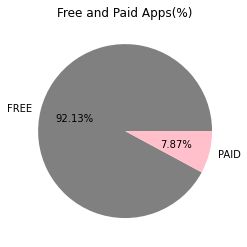

In [66]:
import matplotlib.pyplot as plt
import numpy as np

size=[8900,760]
sentiment = ['FREE', 'PAID']
colors = ['gray', 'pink']
plt.pie(size, labels=sentiment, colors=colors, startangle=360, autopct='%.2f%%')
plt.title('Free and Paid Apps(%)')
plt.show()

Figure 1.1. From this pie chart above, we can see that 92,13% of all apps in the dataset are free to install. While, only 7,87% is paid. Probably this distribution refers to free developer's upload's in Google Play and mostly free content.

Text(0.5, 1.0, '% Distribution of Paided Apps Categories')

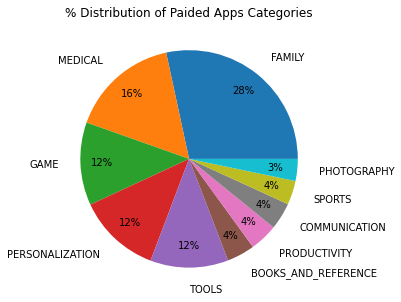

In [69]:
paided = data[data['Type'] == 'Paid']

df3 = paided['Category'].value_counts()
df3 = df3.reset_index()
df3 = df3[:10]
plt.figure(figsize=(10,5))
plt.pie(x = list(df3['Category']), labels=list(df3['index']), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('% Distribution of Paided Apps Categories')

Figure 1.2. From this pie chart above, we can see distribution of all available categories in paid apps. So, leader of chart is family type with 28%. Then comes medical apps that take 16%. While, personalization and games categories scores 12%. Considering this, it can be seen that users can pay more for their family needs and medical features.

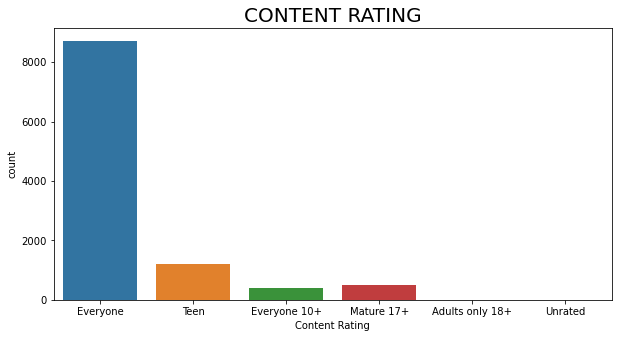

In [83]:
data=pd.read_csv("googleplaystore.csv")

plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Content Rating')
plt.xticks(rotation=0)
plt.title('CONTENT RATING',color = 'black',fontsize=20)
plt.show()

Figure 1.3. On this bar chart is shown distribution of content rating between apps of Google Play. So, leader of the chart will be everyone case. Because most of the content on Google Play is legal for kids(7500). While teen case takes 1000 rate. Then, 17+ rated apps are few(500). Probably it is connected with requirements and rules of uploading app to Google Play Store.

In [70]:
def bar_plot(x,y,y_label,x_label,title,color,ax):
    # plt.figure(figsize=(10,5))
    bar = sns.barplot(x = x,y=y,ax=ax,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar

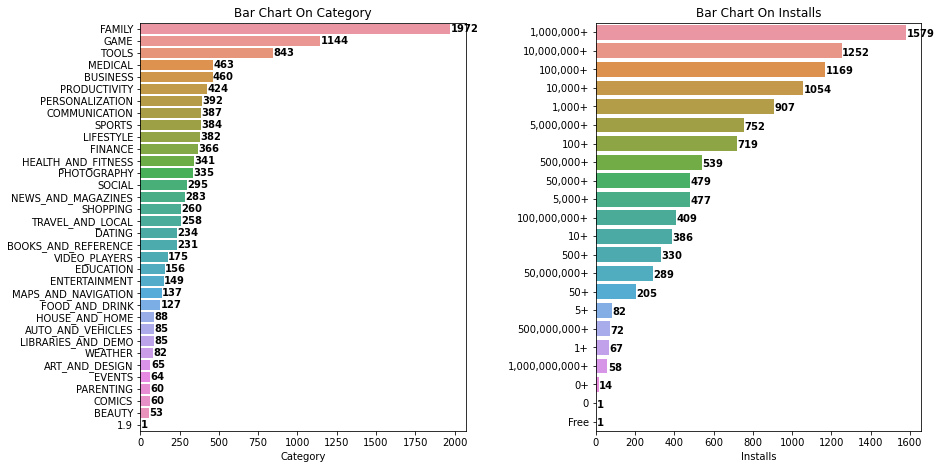

In [84]:
types = ['Category', 'Installs']
fig = plt.figure(figsize=(14,18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for names in types:
    ax1 = fig.add_subplot(2, 2, i)
    df2 = data[names].value_counts()
    df2 = df2.reset_index()
    bar_plot(x = df2[names],y = df2['index'],y_label = '',title = 'Bar Chart On {}'.format(names),color='red',ax=ax1,x_label=names)
    i += 1

Figure 1.4. On this bar charts is shown comparing of app's category and install numbers in Google Play. Starting from categories, there are very popular family, game, tools, medical apps. But for my surprise entertainment and education topic's number is very low. Coming on to install numbers, we can see that mostly popular installed app's are games and shopping application. Because main auditory and users of Google Play are kids and woman.

Mini-conclusion. As I sad before in my research questions,rating of app effects to it's installation numbers. While, users read app's review and looks to it's rating. After they decide to download app or not. Also there are connectivity between content rating and category of app. So,here we can say, as example auto_and_vehicles is interest of adults. While, games and entertainment apps are interest of kids.

It is just 50 percent of data vizualization. Before final I will add everything and perform it better.